## AutoLiftout Figures


In [1]:
%load_ext autoreload
%autoreload 2

from fibsem.detection import detection

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, glob

from fibsem.structures import FibsemImage

import os
from copy import deepcopy
from pathlib import Path

import napari
import napari.utils.notifications
import numpy as np
import tifffile as tff
from PyQt5 import QtWidgets

from fibsem.detection import detection
from fibsem.detection import utils as det_utils
from fibsem.detection.detection import DetectedFeatures
from fibsem.segmentation import model as fibsem_model
from fibsem.segmentation.model import load_model
from fibsem.structures import (
    BeamType,
    FibsemImage,
    Point,
)
from PyQt5.QtCore import pyqtSignal
from fibsem.ui.qtdesigner_files import FibsemDetectionWidget
import logging

CHECKPOINT_PATH = os.path.join(os.path.dirname(fibsem_model.__file__), "models", "model4.pt")

/home/patrick/miniconda3/envs/fibsem/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Error: 'ImageDescription'


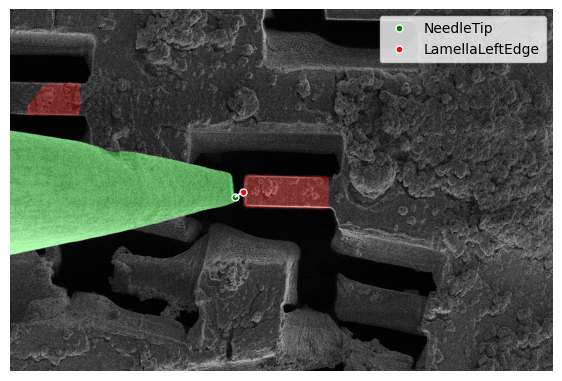

Error: 'ImageDescription'


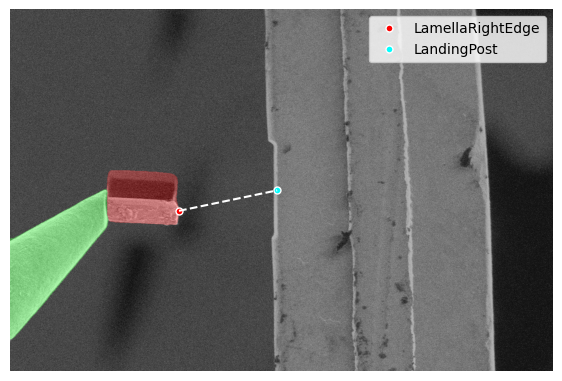

Error: 'ImageDescription'


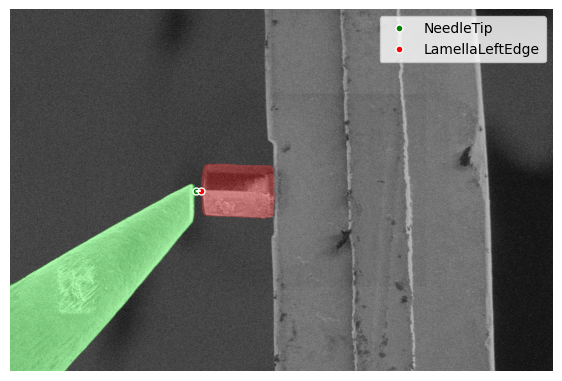

In [25]:
liftout_start = "/home/patrick/github/autoliftout/docs/img/01-subtle-bear/tif/needle_liftout_start_position_eb.tif"
landing_ready = "/home/patrick/github/autoliftout/docs/img/01-subtle-bear/tif/landing_needle_ready_position_ib.tif"
landing_finish = "/home/patrick/github/autoliftout/docs/img/01-subtle-bear/tif/landing_lamella_needle_removal_low_res_ib.tif"


weld_exposure = "/home/patrick/github/autoliftout/docs/img/01-subtle-bear/tif/ref_landing_lamella_high_res_ib.tif"
weld_spot = ""

checkpoint = str(CHECKPOINT_PATH)
encoder="resnet34"
num_classes = 3
model = load_model(checkpoint=checkpoint, encoder=encoder, nc=num_classes)


filenames = [liftout_start, landing_ready, landing_finish]

feature_list = [[detection.NeedleTip(), detection.LamellaLeftEdge()],
[detection.LamellaRightEdge(), detection.LandingPost()], 
[detection.NeedleTip(), detection.LamellaLeftEdge()]]


for fname, features in zip(filenames, feature_list):
    image = FibsemImage.load(fname)

    # detect features
    pixelsize = image.metadata.pixel_size.x if image.metadata is not None else 25e-9
    det = detection.locate_shift_between_features_v2(
        deepcopy(image.data), model, features=features, pixelsize=pixelsize
    )

    fig, ax = plt.subplots(1, 1, figsize=(7, 5))

    ax.imshow(det.image, cmap="gray")
    ax.imshow(det.rgb, alpha=0.3)
    # ax.set_title("Prediction")
    ax.axis("off")
    for f in det.features:
        
        if isinstance(f, (detection.LamellaCentre, 
                          detection.LamellaLeftEdge, 
                          detection.LamellaRightEdge)):
            f.color = "red"

        ax.plot(f.px.x, f.px.y, 
                    "o",  color=f.color, 
                    markersize=5, markeredgecolor="w", 
                    label=f.name)
    ax.legend(loc="best")

    if len(det.features) == 2:
        # plot white line between features
        ax.plot([det.features[0].px.x, det.features[1].px.x],
                    [det.features[0].px.y, det.features[1].px.y], 
                    color="w", linestyle="--")

    # save fig dpi=300
    save_path = os.path.join(os.getcwd(), "figures")
    os.makedirs(save_path, exist_ok=True)
    basename = os.path.basename(fname).replace(".tif", ".png")
    plt.savefig(os.path.join(save_path, basename), dpi=300, bbox_inches="tight")

    plt.show()


In [29]:
# convert to png
weld_exposure = "/home/patrick/github/autoliftout/docs/img/01-subtle-bear/tif/ref_landing_lamella_high_res_ib.tif"
weld_spot = "/home/patrick/github/fibsem/scratch/figure/liftout/ref_landing_lamella_high_res_ib.tif"

outnames = ["weld_exposure.png", "weld_spot.png"]
filenames = [weld_exposure, weld_spot]
for fname, outname in zip(filenames, outnames):

    image = FibsemImage.load(fname)
    image.data = image.data.astype(np.float32)

    # save as png
    save_path = os.path.join(os.getcwd(), "figures")
    os.makedirs(save_path, exist_ok=True)
    basename = outname
    plt.imsave(os.path.join(save_path, basename), image.data, cmap="gray")


Error: 'ImageDescription'
Error: 'ImageDescription'


/home/patrick/github/autoliftout/docs/img/01-gentle-dog/liftout_contact_brightness_09_ib.tif /home/patrick/github/autoliftout/liftout/tools/figures/contact/2/liftout_contact_brightness_2_ib.tif
/home/patrick/github/autoliftout/docs/img/01-gentle-dog/liftout_contact_brightness_10_ib.tif /home/patrick/github/autoliftout/liftout/tools/figures/contact/2/liftout_contact_brightness_3_ib.tif
/home/patrick/github/autoliftout/docs/img/01-gentle-dog/liftout_contact_brightness_11_ib.tif /home/patrick/github/autoliftout/liftout/tools/figures/contact/2/liftout_contact_brightness_4_ib.tif
/home/patrick/github/autoliftout/docs/img/01-gentle-dog/liftout_contact_brightness_12_ib.tif /home/patrick/github/autoliftout/liftout/tools/figures/contact/2/liftout_contact_brightness_5_ib.tif
/home/patrick/github/autoliftout/docs/img/01-gentle-dog/liftout_contact_brightness_13_ib.tif /home/patrick/github/autoliftout/liftout/tools/figures/contact/2/liftout_contact_brightness_6_ib.tif
/home/patrick/github/autolifto

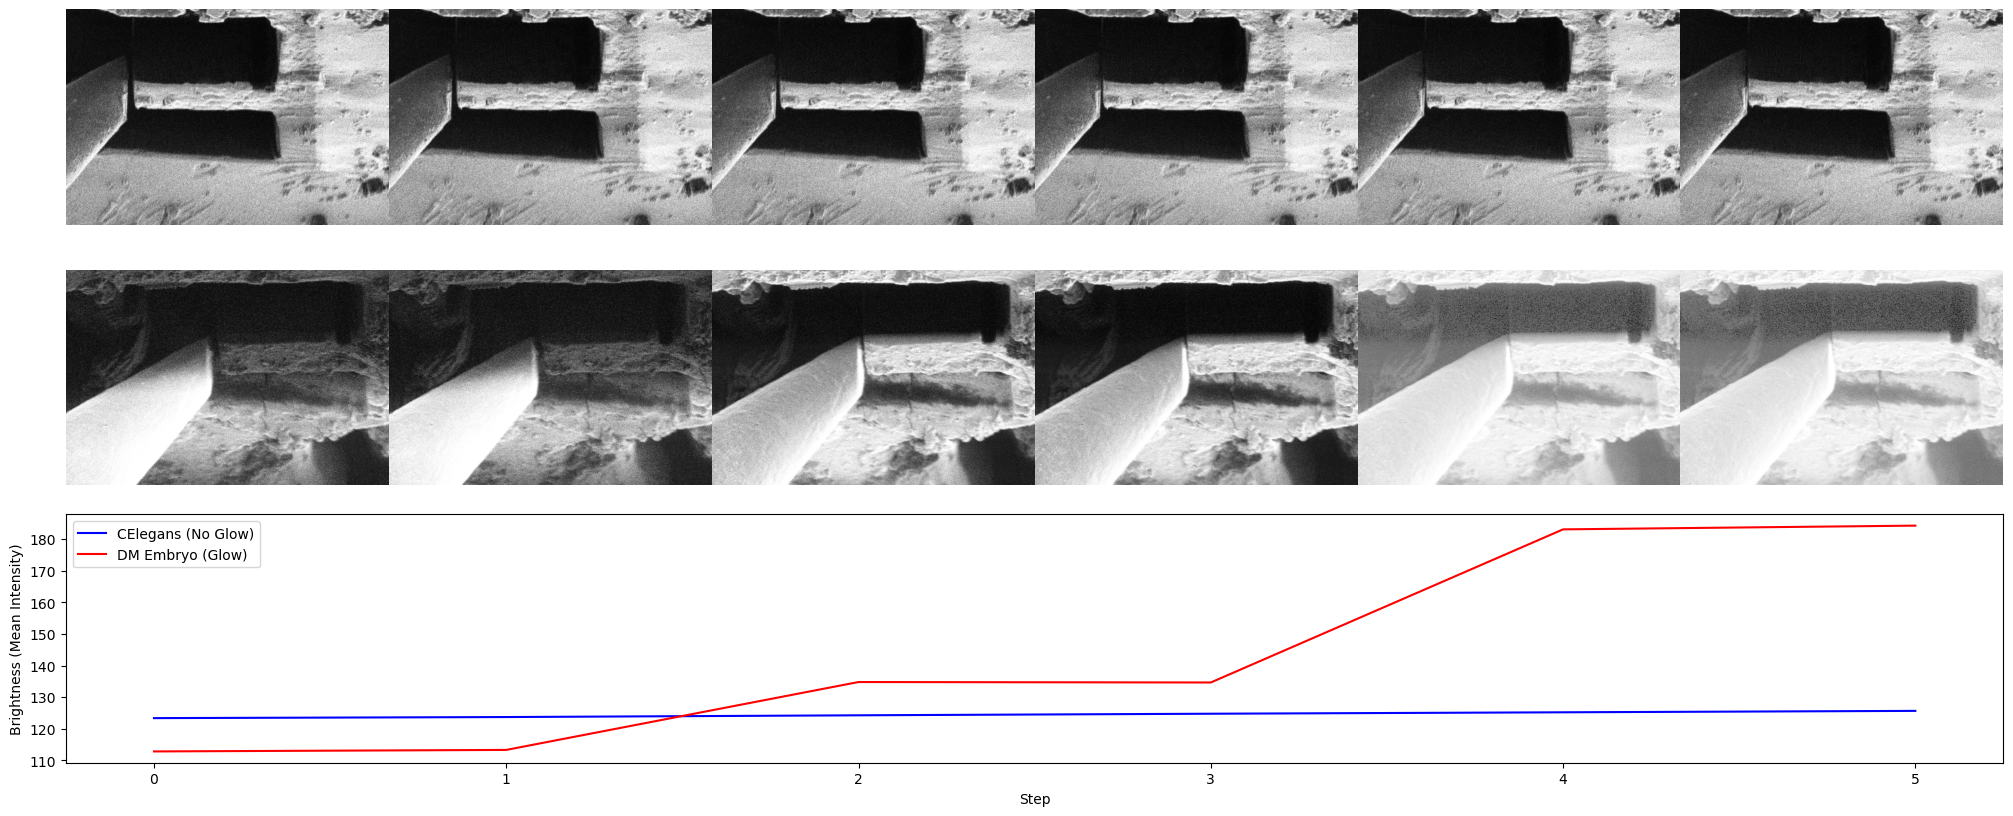

In [69]:
# celgans: /home/patrick/github/autoliftout/docs/img/01-gentle-dog
# dm-embryo: /home/patrick/github/autoliftout/docs/img/01-subtle-bear

no_glow_path = "/home/patrick/github/autoliftout/docs/img/01-gentle-dog"
glow_path = "/home/patrick/github/autoliftout/liftout/tools/figures/contact/2"



no_glow_files = sorted(glob.glob(os.path.join(no_glow_path, "*contact_brightness*.tif")))
glow_files = sorted(glob.glob(os.path.join(glow_path, "*contact_brightness*.tif")))

from pprint import pprint
# pprint(no_glow_files)
# pprint(glow_files)

N_IMAGES = 6# max(len(no_glow_files),len(glow_files))
filenames = list(zip(no_glow_files[-N_IMAGES:], glow_files[-N_IMAGES:]))

# fig, ax = plt.subplots(3, len(filenames), figsize=(15, 5))

fig = plt.figure(figsize=(25, 10))
gs = fig.add_gridspec(3, len(filenames))

noglow_brightness = []
glow_brightness = []

for i, (f1, f2) in enumerate(filenames):
    
    print(f1, f2)

    ax1 = fig.add_subplot(gs[0, i])
    ax2 = fig.add_subplot(gs[1, i])
    # plot
    img1= tff.imread(f1)
    img2 = tff.imread(f2)

    # get brightness
    noglow_brightness.append(img1.mean())
    glow_brightness.append(img2.mean())

    ax1.imshow(img1, cmap="gray")
    ax2.imshow(img2, cmap="gray")

    # axes off
    ax1.axis("off")
    ax2.axis("off")

ax3 = fig.add_subplot(gs[2, :])

# plot brightness across all columns of subplot
ax3.plot(range(len(noglow_brightness)), noglow_brightness, "blue", label="CElegans (No Glow)")
ax3.plot(range(len(glow_brightness)), glow_brightness, "red", label="DM Embryo (Glow)")
ax3.set_xlabel("Step")
ax3.set_ylabel("Brightness (Mean Intensity)")
ax3.legend(loc="best")

# no spacing
plt.subplots_adjust(wspace=0, hspace=0.05)

# save figure dpi = 300
save_path = os.path.join(os.getcwd(), "figures")
os.makedirs(save_path, exist_ok=True)
basename = "contact_brightness.png"
plt.savefig(os.path.join(save_path, basename), dpi=300, bbox_inches="tight")

plt.show()

## Run Statistics


In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv("statistics.csv")


# display(df)

# convert date column to datetime
df["date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

# drop Date column
df = df.drop("Date", axis=1)

# drop rows with Attempted = 0
df = df[df["Attempted"] != 0]

#rename Succesful to Successful
df = df.rename(columns={"Succesful": "Successful"})
# calculate success rate
df["Success"] = df["Successful"] / df["Attempted"]

# sort df by date
df = df.sort_values(by="date")

In [83]:

# calculate months since min
# get min year
min_year = df["date"].min().year
# get min month in min year
min_month = df[df["date"].dt.year == min_year]["date"].min().month

# calculate months since min
df["months_since_min"] = (df["date"].dt.year - min_year) * 12 + (df["date"].dt.month - min_month)

df_grouped = df.groupby(["Sample", "months_since_min"]).sum().reset_index()

# drop all columns except Sample, months_since_min, Attempted, Successful
df_grouped = df_grouped[["Sample", "months_since_min", "Attempted", "Successful"]]

# calculate success rate
df_grouped["Success"] = df_grouped["Successful"] / df_grouped["Attempted"]

# sort by months since min
df_grouped = df_grouped.sort_values(by="months_since_min")

display(df_grouped)

# plot success as  bar chart, color by sample with plotly express
import plotly.express as px

fig = px.bar(df_grouped, x="months_since_min", y="Success", color="Sample", barmode="group")


# set xlabel as Months Since First Attempt
fig.update_layout(title="Success Rate vs Month", xaxis_title="Months Since First Attempt")

fig.show()


/tmp/ipykernel_72067/2458058054.py:10: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Sample,months_since_min,Attempted,Successful,Success
1,dm-embryo,0,14,3,0.214286
2,dm-embryo,1,15,5,0.333333
3,dm-embryo,3,16,7,0.437500
4,dm-embryo,4,31,16,0.516129
5,dm-embryo,5,31,19,0.612903
6,dm-embryo,6,3,0,0.000000
8,yeast,7,9,4,0.444444
7,dm-embryo,8,10,5,0.500000
9,yeast,8,23,14,0.608696
0,celegans,9,9,5,0.555556


In [84]:
# plot df, success rate vs date, plotly express
fig = px.scatter(df, x="date", y="Success", color="Sample")
# set title, success rate
fig.update_layout(title="Success Rate vs Date", yaxis_title="Success Rate")
fig.show()

In [85]:
# plot attempted vs date, plotly express
fig = px.scatter(df, x="date", y="Attempted", color="Sample")
# set title, success rate
fig.update_layout(title="Attempted vs Date", yaxis_title="Attempted")
fig.show()